In [23]:
import numpy as np
PATH = "/home/kikosolovic/Desktop/NeuralNetwork/archive/HistoricalData_1727082972821.csv"

In [25]:
pos = 1
close = []

with open (PATH, 'r') as file:
    for line in file.readlines()[1:]:
        close.append(float(line.split(',')[pos][1:]))
print(len(close))
        

2516


In [27]:
history = []
label = []
for i in range(len(close[:-21])):

    history.append(close[i:i+20])
    label.append(close[i+20])
    
history = np.array(history)
labels = np.array(label)

In [29]:
indices = np.arange(history.shape[0])
np.random.shuffle(indices)
X = history[indices]
y = labels[indices]


In [31]:
split = int(0.8 * X.shape[0])
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [33]:
from tensorflow.keras import models, layers, optimizers

# Updated model
model = models.Sequential([
    layers.Input(shape=(20,)),  # Input layer for shape (20,)
    
    layers.Dense(64, activation='relu'),  # First hidden layer
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    layers.Dense(128, activation='relu'),  # Second hidden layer
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(64, activation='relu'),  # Third hidden layer
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(1, activation='linear')  # Output layer for continuous output
])

# Learning rate schedule
initial_learning_rate = 0.001
lr_schedule = optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.9,
    staircase=True
)

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=lr_schedule),
              loss='mean_squared_error',  # Use MSE for regression
              metrics=['mae'])  # Mean Absolute Error for regression evaluation


In [35]:
history = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=8,
    validation_split=0.2,
    steps_per_epoch = 100
)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

Epoch 1/8
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 11497.5967 - mae: 90.0483 - val_loss: 9174.9971 - val_mae: 80.4353
Epoch 2/8
  1/100 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 9258.0391 - mae: 79.7701

2024-09-23 11:20:50.349671: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/home/kikosolovic/anaconda3/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10421.3408 - mae: 88.0175 - val_loss: 8415.5547 - val_mae: 80.1114
Epoch 3/8
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - loss: 9774.1777 - mae: 87.0612 - val_loss: 7899.4780 - val_mae: 81.1047
Epoch 4/8
  1/100 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 12157.0000 - mae: 98.6050

2024-09-23 11:20:50.622074: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - loss: 9383.2188 - mae: 87.0549 - val_loss: 7757.4390 - val_mae: 82.7285
Epoch 5/8
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - loss: 8564.4609 - mae: 84.2919 - val_loss: 7666.2046 - val_mae: 83.8163
Epoch 6/8
 41/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7746.9082 - mae: 81.3974 

2024-09-23 11:20:50.843524: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - loss: 7649.0728 - mae: 81.0336 - val_loss: 6697.8374 - val_mae: 79.4597
Epoch 7/8
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - loss: 6960.1562 - mae: 78.4498 - val_loss: 6341.9316 - val_mae: 78.0510
Epoch 8/8
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 6260.5283 - mae: 74.7658 - val_loss: 5508.4419 - val_mae: 73.0726
16/16 - 0s - 1ms/step - loss: 5496.9351 - mae: 73.1023

Test accuracy: 73.1022720336914


2024-09-23 11:20:51.274715: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


In [37]:
closeLast = []

with open (PATH, 'r') as file:
    for line in file.readlines()[-21:]:
        closeLast.append(float(line.split(',')[4]))
print((closeLast))
x = np.array(closeLast[:-1])
rx =x.copy()
print(x)
print((x.shape))




ValueError: could not convert string to float: '$25.755'

In [39]:
for i in x:
    print("old: ",i)
for i in range(20):
    prediction = model.predict(x.reshape(1,-1))
    x = np.delete(x,[0])
    x = np.append(x,prediction[0][0])
    print('prediction: ',prediction[0][0])


NameError: name 'x' is not defined

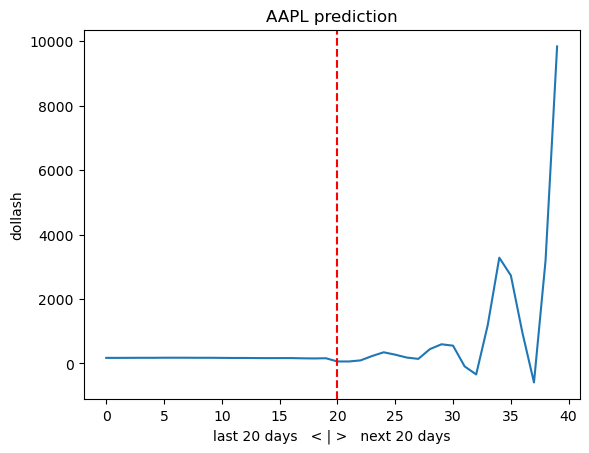

In [203]:
import matplotlib.pyplot as plt
y = np.concatenate((rx,x),axis=0)
plt.plot(y)
x_line = len(y)/2 
plt.axvline(x=x_line, color='red', linestyle='--', label='Vertical Line')

plt.ylabel('dollash')
plt.xlabel('last 20 days   < | >   next 20 days')
plt.title("AAPL prediction")
plt.show()